In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from KeemPlot import KeemPlot as kp

In [100]:
df = pd.read_pickle("/Volumes/onishlab_shared/PROJECTS/30_Andrew/03_IMAGING_DATABASE/IMDB.pkl")
data = df.loc[:, ["diet", "REP", "array_vals"]].values

In [101]:
data_age = df.loc[:, ["diet", "stage", "array_vals"]].values

In [102]:
J_age = data_age[data_age[:, 0] == "JUB66_RFP"]
CB_age = data_age[data_age[:, 0] == "JUB66_RFP_IN_CEMBIO"]
NC_age = data_age[data_age[:, 0] == "MK_JUB66_RFP_IN_JUB66"]

In [103]:
J = data[data[:, 0] == "JUB66_RFP"]
CB = data[data[:, 0] == "JUB66_RFP_IN_CEMBIO"]
NC = data[data[:, 0] == "MK_JUB66_RFP_IN_JUB66"]

In [104]:
J_staged = [J_age[J_age[:, 1] == "YL4"][:,2], J_age[J_age[:, 1] == "L4"][:,2], J_age[J_age[:, 1] == "OL4"][:,2]]

In [105]:
CB_staged = [CB_age[CB_age[:, 1] == "YL4"][:,2], CB_age[CB_age[:, 1] == "L4"][:,2], CB_age[CB_age[:, 1] == "OL4"][:,2]]

In [106]:
NC_staged = [NC_age[NC_age[:, 1] == "YL4"][:,2], NC_age[NC_age[:, 1] == "L4"][:,2], NC_age[NC_age[:, 1] == "OL4"][:,2]]

In [107]:
J_reps = [J[J[:, 1] == 1][:, 2], J[J[:, 1] == 2][:, 2], J[J[:, 1] == 3][:, 2]]

In [108]:
J_staged[0].shape, CB_staged[0].shape, NC_staged[0].shape

((12,), (4,), (8,))

In [109]:
CB_reps = [CB[CB[:, 1] == 1][:, 2],
CB[CB[:, 1] == 2][:, 2],
CB[CB[:, 1] == 3][:, 2]]

In [110]:
NC_reps = [NC[NC[:, 1] == 1][:, 2],
NC[NC[:, 1] == 2][:, 2],
NC[NC[:, 1] == 3][:, 2]]

In [111]:
J = np.stack(J)
CB = np.stack(CB)
NC = np.stack(NC)

In [132]:
J.shape, CB.shape, NC.shape

((30, 3), (30, 3), (30, 3))

In [138]:
J_ma_plt = np.sum(np.stack(J[:, 2]), axis=0)
CB_ma_plt = np.sum(np.stack(CB[:, 2]), axis=0)
NC_ma_plt = np.sum(np.stack(NC[:, 2]), axis=0)

In [113]:
def calc_moving_avg(data, window_size):
    """Calculate moving average of data with given window size."""
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

In [140]:
windows_size = 150

In [141]:
moving_avg_data = [calc_moving_avg(J_ma_plt, window_size), calc_moving_avg(CB_ma_plt, windows_size), calc_moving_avg(NC_ma_plt, windows_size)]

In [114]:
window_size = 150
J_ma = calc_moving_avg(np.sum(J, axis=0), window_size)
CB_ma = calc_moving_avg(np.sum(CB, axis=0), window_size)
NC_ma = calc_moving_avg(np.sum(NC, axis=0), window_size)
mas = [J_ma, CB_ma, NC_ma]

TypeError: can't multiply sequence by non-int of type 'float'

In [115]:
J_mas = [calc_moving_avg(np.sum(j, axis=0), window_size) for j in J_reps]
CB_mas = [calc_moving_avg(np.sum(cb, axis=0), window_size) for cb in CB_reps]
NC_mas = [calc_moving_avg(np.sum(nc, axis=0), window_size) for nc in NC_reps]

In [116]:
J_ma_ind = [calc_moving_avg(j, window_size) for j in J]
CB_ma_ind = [calc_moving_avg(cb, window_size) for cb in CB]

TypeError: can't multiply sequence by non-int of type 'float'

In [117]:
J_staged = [calc_moving_avg(np.sum(j, axis=0) / len(j), window_size) for j in J_staged]
CB_staged = [calc_moving_avg(np.sum(cb, axis=0) / len(cb), window_size) for cb in CB_staged]
NC_staged = [calc_moving_avg(np.sum(nc, axis=0) / len(nc), window_size) for nc in NC_staged]

In [118]:
groups = [J_mas, CB_mas, NC_mas]

In [119]:
groups_age = [J_staged, CB_staged, NC_staged]

In [120]:
titles = ["J", "CB", "NC"]

Text(0.02, 0.5, '')

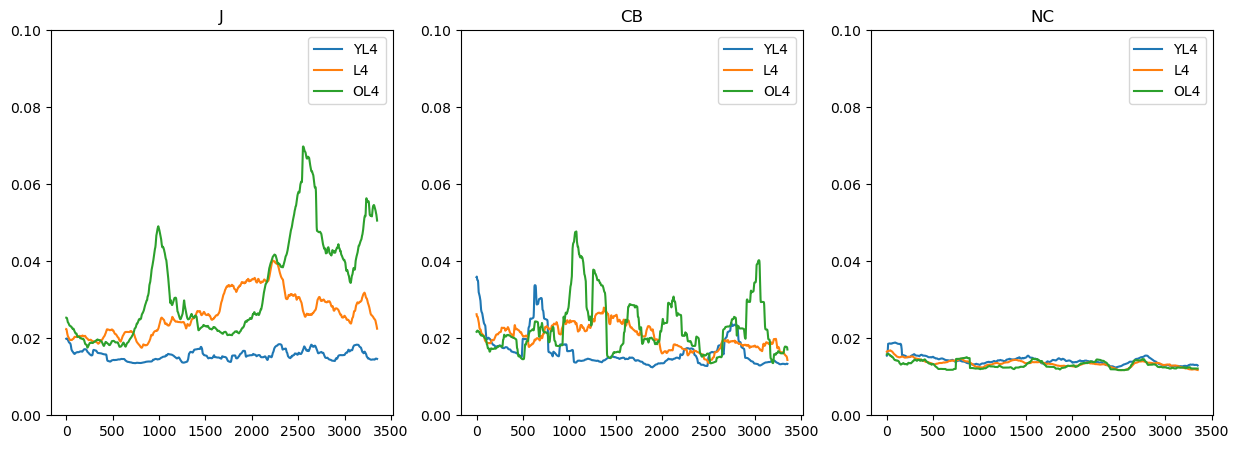

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    ax.plot(groups_age[i][0], label="J")
    ax.plot(groups_age[i][1], label="CB")
    ax.plot(groups_age[i][2], label="NC")
    ax.set_ylim(0,0.1)
    ax.legend(["YL4", "L4", "OL4"])
    ax.set_title(titles[i])
fig.supylabel("")


In [124]:
titles = ["JUb66(RFP)", "JUb66(RFP) in CeMbio", "Methanol Killed JUb66(RFP)"]

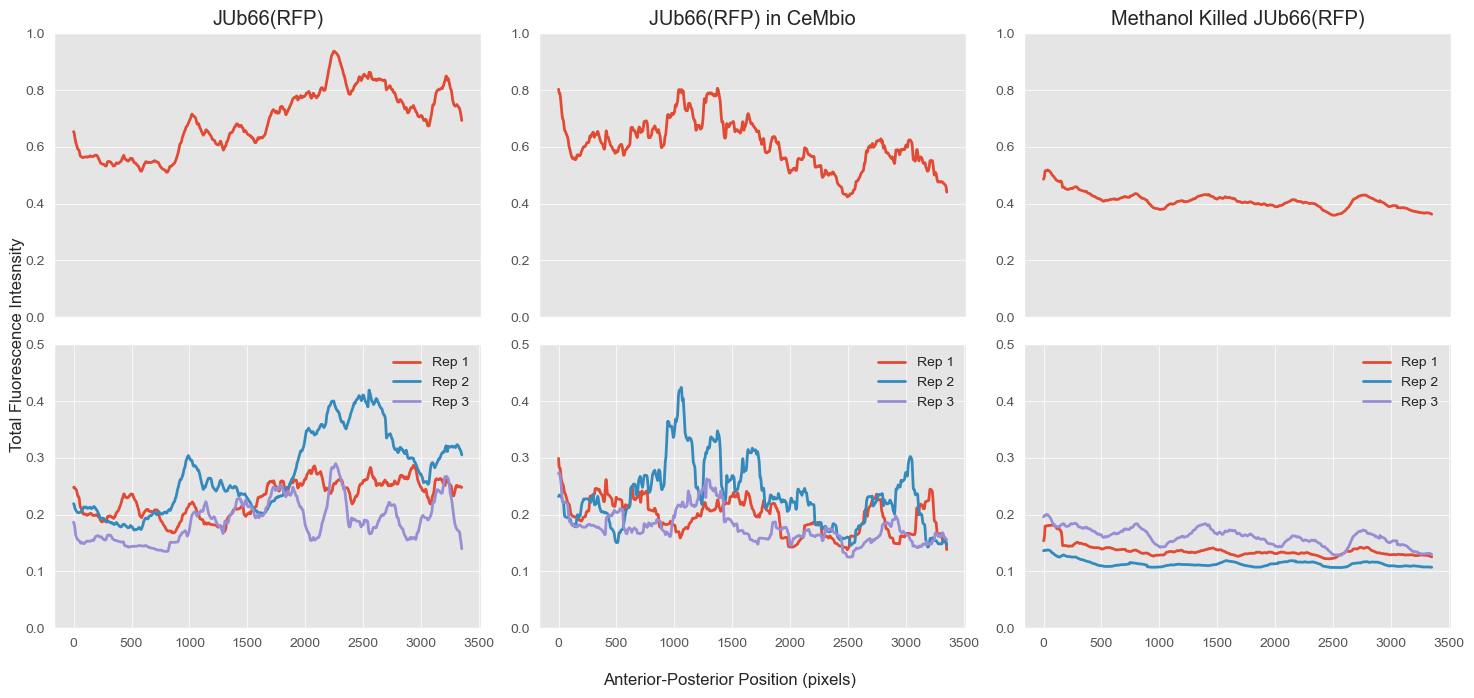

In [156]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

for i, ax in enumerate(axes[0]):
    ax.plot(moving_avg_data[i], label="Intensity")
    ax.set_ylim(0,1)
    ax.set_xticks([])
    ax.set_title(titles[i])



for i, ax in enumerate(axes[1]):
    ax.plot(groups[i][0], label="JUb66(RFP)")
    ax.plot(groups[i][1], label="JUb66(RFP) in CeMbio")
    ax.plot(groups[i][2], label="Methanol Killed JUb66(RFP)")
    ax.set_ylim(0,0.5)
    ax.legend(["Rep 1", "Rep 2", "Rep 3"])

fig.supylabel("Total Fluorescence Intesnsity")
fig.supxlabel("Anterior-Posterior Position (pixels)")

plt.style.use('seaborn-v0_8-colorblind')

fig.tight_layout()
fig.savefig("./figs/REP_Moving_Avg_windowsize150.png")

In [73]:

for t in CB_ma_ind:
    plt.plot(t)

plt.title("JUb66(RFP) Samples");

NameError: name 'CB_ma_ind' is not defined

In [74]:
for m in mas:
    plt.plot(m);

plt.legend(['J', 'CB', 'MK'])

NameError: name 'mas' is not defined

In [75]:
def find_sad(data):
    try_mas = np.arange(10, 1000, 5)

    SAD = []

    for k in try_mas:
        ma = calc_moving_avg(np.sum(data, axis=0), k)
        sad = np.sum(np.abs(ma - np.sum(data, axis=0)))
        SAD.append(sad)

    return SAD

In [76]:
try_mas = np.arange(10, 1000, 5)

In [77]:
sad_J = find_sad(J)
sad_CB = find_sad(CB)
sad_NC = find_sad(NC)

TypeError: can't multiply sequence by non-int of type 'float'

In [78]:
plt.plot(try_mas, sad_J)
plt.plot(try_mas, sad_CB)
plt.plot(try_mas, sad_NC)


NameError: name 'sad_J' is not defined

In [79]:
groups = [J, CB, NC]

In [80]:
avgs = []
J_codes   =  [kp.create_barcode(kp, j) for j in groups[0]]
CB_codes  =  [kp.create_barcode(kp, cb) for cb in groups[1]]
NC_codes  =  [kp.create_barcode(kp, nc) for nc in groups[2]]

for g in groups:

    avgs.append(kp.create_barcode(kp, np.sum(g, axis=0) / np.sqrt(g.shape[0]) * 1.5))

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [81]:
kp.plot_barcodes(kp, avgs, save="./figs/avgs.svg")

ValueError: Number of rows must be a positive integer, not 0

<Figure size 640x480 with 0 Axes>

TypeError: Image data of dtype object cannot be converted to float

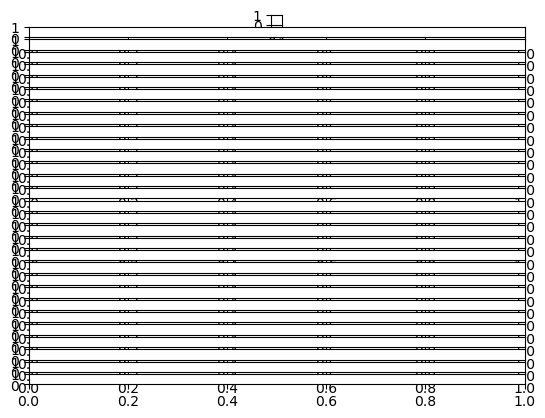

In [82]:
kp.plot_barcodes(kp, J_codes, save="./figs/J_codes.png")

TypeError: Image data of dtype object cannot be converted to float

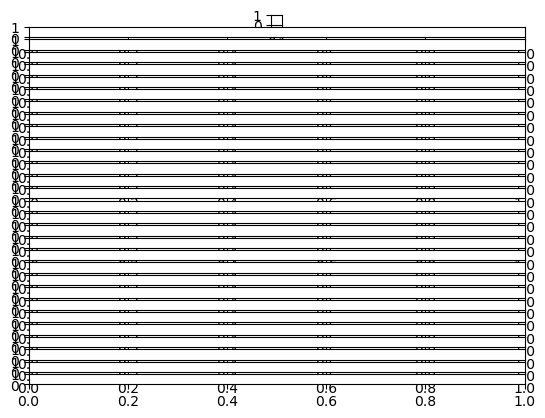

In [83]:
kp.plot_barcodes(kp, CB_codes, save = "./figs/CB_codes.png")

TypeError: Image data of dtype object cannot be converted to float

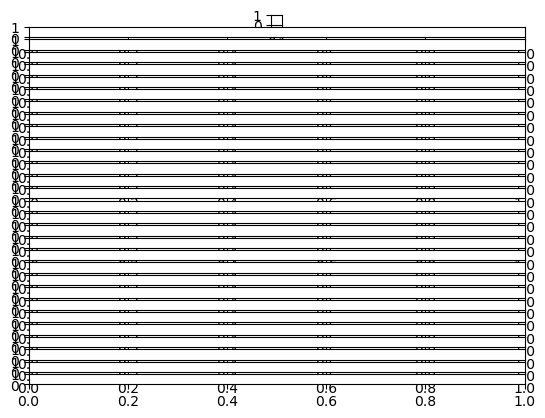

In [84]:
kp.plot_barcodes(kp, NC_codes, save = "./figs/NC_codes.png")

In [96]:
def create_boxplot(arr, sections, save=None):
    arrs = np.array_split(arr, sections, axis=1)
    print(arrs[0].shape)


    fig, axs = plt.subplots(1, sections, figsize=(15, 5), sharex=True, sharey=True)
    for i, ax in enumerate(axs):
        ax.boxplot(np.sum(arrs[i], axis=1))
        
        ax.set_ylim([0,60])
        ax.set_xticks([])
        ax.set_xlabel(i+1)

    fig.supylabel("Total Intensity")
    fig.tight_layout()

    if save != None:
        fig.savefig(save, dpi=300)
        

In [88]:
J = J[:, 2]

In [92]:
J = np.stack(J)

In [93]:
J.shape

(30, 3500)

(30, 1167)


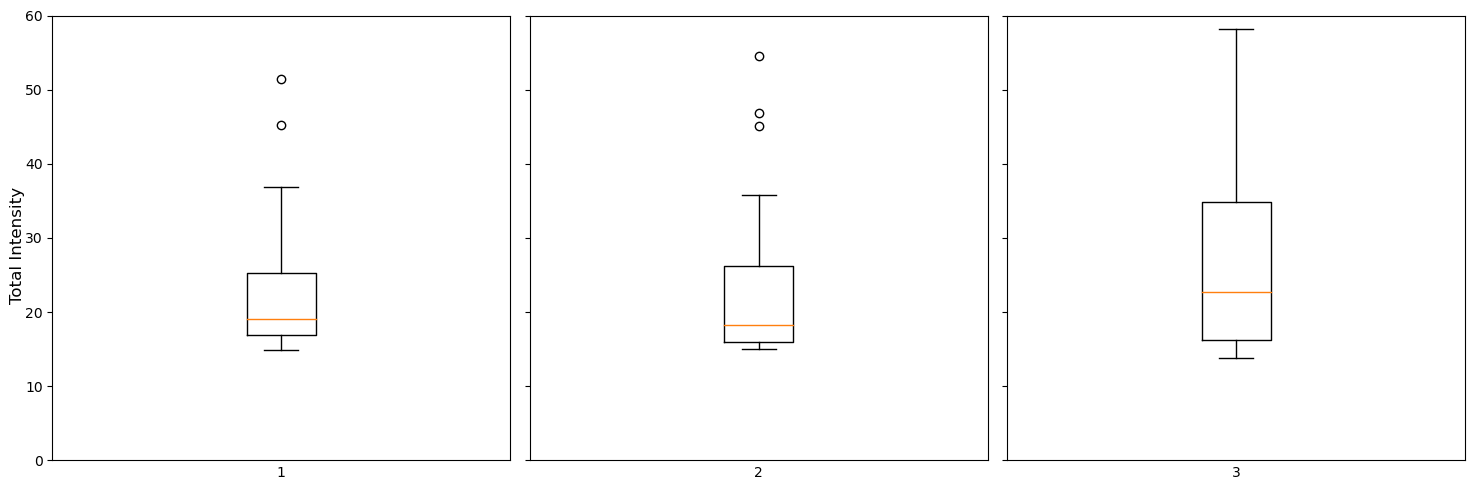

In [97]:
create_boxplot(J, 3)

In [86]:
create_boxplot(CB, 10, save="./figs/CB_boxplot.png")

ValueError: array split does not result in an equal division

In [87]:
create_boxplot(NC, 10, save="./figs/NC_boxplot.png")

ValueError: array split does not result in an equal division